In [3]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import preprocessing
from scipy.stats import norm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [4]:
df_train=pd.read_csv("C:/Users/hitech services/Downloads/heart.csv")

In [5]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df_train['sex']=df_train['sex'].astype(object)
df_train['fbs']=df_train['fbs'].astype(object)
df_train['exang']=df_train['exang'].astype(object)

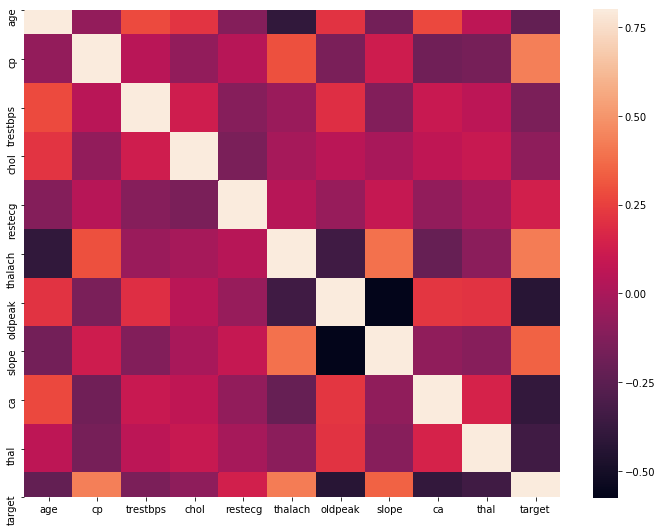

In [8]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
encoded = pd.get_dummies(df_train)
encoded.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,target,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1
0,63,3,145,233,0,150,2.3,0,0,1,1,0,1,0,1,1,0
1,37,2,130,250,1,187,3.5,0,0,2,1,0,1,1,0,1,0
2,41,1,130,204,0,172,1.4,2,0,2,1,1,0,1,0,1,0
3,56,1,120,236,1,178,0.8,2,0,2,1,0,1,1,0,1,0
4,57,0,120,354,1,163,0.6,2,0,2,1,1,0,1,0,0,1


In [10]:
dependent_all=encoded['target']
independent_all=encoded.drop(['target'],axis=1)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(independent_all,dependent_all,test_size=0.3,random_state=100)

In [12]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [13]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
#XGBoost modelon the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
XGB_score

0.9952830188679245

In [15]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
XGB_score

0.8021978021978022

In [16]:
rfc2=RandomForestClassifier()
rfc2.fit(x_train,y_train)
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print(rfc_score)
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print(rfc_score)

0.9952830188679245
0.8241758241758241


C:\Users\hitech services\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
log =LogisticRegression()
log.fit(x_train,y_train)
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print(log_score)
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print(log_score)

0.8584905660377359
0.8681318681318682


C:\Users\hitech services\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
#model on train using all the independent values in df
dec_prediction = dec.predict(x_train)
dec_score= accuracy_score(y_train,dec_prediction)
print(dec_score)
#model on test using all the independent values in df
dec_prediction = dec.predict(x_test)
dec_score= accuracy_score(y_test,dec_prediction)
print(dec_score)

1.0
0.7362637362637363


In [19]:
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)
#model on train using all the independent values in df
etc_prediction = etc.predict(x_train)
etc_score= accuracy_score(y_train,etc_prediction)
print(etc_score)
#model on test using all the independent values in df
etc_prediction = etc.predict(x_test)
etc_score= accuracy_score(y_test,etc_prediction)
print(etc_score)

1.0
0.8021978021978022


In [20]:
ada =AdaBoostClassifier()
ada.fit(x_train,y_train)
#model on train using all the independent values in df
ada_prediction = ada.predict(x_train)
ada_score= accuracy_score(y_train,ada_prediction)
print(ada_score)
#model on test using all the independent values in df
ada_prediction = ada.predict(x_test)
ada_score= accuracy_score(y_test,ada_prediction)
print(ada_score)

0.9481132075471698
0.8131868131868132


In [21]:
bca =BaggingClassifier()
bca.fit(x_train,y_train)
#model on train using all the independent values in df
bca_prediction = bca.predict(x_train)
bca_score= accuracy_score(y_train,bca_prediction)
print(bca_score)
#model on test using all the independent values in df
bca_prediction = bca.predict(x_test)
bca_score= accuracy_score(y_test,bca_prediction)
print(bca_score)

0.9811320754716981
0.8351648351648352


In [22]:
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(solver ='lbfgs',  
                                     multi_class ='multinomial',  
                                     max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier()))

In [23]:
vc=VotingClassifier(estimators = estimator, voting ='hard') 
vc.fit(x_train,y_train)
#model on train using all the independent values in df
vc_prediction = vc.predict(x_train)
vc_score= accuracy_score(y_train,vc_prediction)
print(vc_score)
#model on test using all the independent values in df
vc_prediction = vc.predict(x_test)
vc_score= accuracy_score(y_test,vc_prediction)
print(vc_score)

1.0
0.8241758241758241


C:\Users\hitech services\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [24]:
vc=VotingClassifier(estimators = estimator, voting ='soft') 
vc.fit(x_train,y_train)
#model on train using all the independent values in df
vc_prediction = vc.predict(x_train)
vc_score= accuracy_score(y_train,vc_prediction)
print(vc_score)
#model on test using all the independent values in df
vc_prediction = vc.predict(x_test)
vc_score= accuracy_score(y_test,vc_prediction)
print(vc_score)

C:\Users\hitech services\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8915094339622641
0.7692307692307693


In [25]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
#model on train using all the independent values in df
gbc_prediction = gbc.predict(x_train)
gbc_score= accuracy_score(y_train,gbc_prediction)
print(gbc_score)
#model on test using all the independent values in df
gbc_prediction =gbc.predict(x_test)
gbc_score= accuracy_score(y_test,gbc_prediction)
print(gbc_score)

0.9952830188679245
0.8131868131868132


In [26]:
ettc=ExtraTreesClassifier()
ettc.fit(x_train,y_train)
#model on train using all the independent values in df
ettc_prediction = ettc.predict(x_train)
ettc_score= accuracy_score(y_train,ettc_prediction)
print(ettc_score)
#model on test using all the independent values in df
ettc_prediction =ettc.predict(x_test)
ettc_score= accuracy_score(y_test,ettc_prediction)
print(ettc_score)

1.0
0.8351648351648352


C:\Users\hitech services\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
#model on train using all the independent values in df
sgdc_prediction = sgdc.predict(x_train)
sgdc_score= accuracy_score(y_train,sgdc_prediction)
print(sgdc_score)
#model on test using all the independent values in df
sgdc_prediction =sgdc.predict(x_test)
sgdc_score= accuracy_score(y_test,sgdc_prediction)
print(sgdc_score)

0.4339622641509434
0.5054945054945055


In [28]:
pac=PassiveAggressiveClassifier()
pac.fit(x_train,y_train)
#model on train using all the independent values in df
pac_prediction = pac.predict(x_train)
pac_score= accuracy_score(y_train,pac_prediction)
print(pac_score)
#model on test using all the independent values in df
pac_prediction =pac.predict(x_test)
pac_score= accuracy_score(y_test,pac_prediction)
print(pac_score)

0.6179245283018868
0.5494505494505495


In [29]:
rc=RidgeClassifier()
rc.fit(x_train,y_train)
#model on train using all the independent values in df
rc_prediction = rc.predict(x_train)
rc_score= accuracy_score(y_train,rc_prediction)
print(rc_score)
#model on test using all the independent values in df
rc_prediction =rc.predict(x_test)
rc_score= accuracy_score(y_test,rc_prediction)
print(rc_score)

0.8537735849056604
0.8791208791208791


In [36]:
nn=MLPClassifier()
nn.fit(x_train,y_train)
nn_prediction = nn.predict(x_train)
nn_score= accuracy_score(y_train,nn_prediction)
print(nn_score)
#model on test using all the independent values in df
nn_prediction =nn.predict(x_test)
nn_score= accuracy_score(y_test,nn_prediction)
print(nn_score)

0.839622641509434
0.8131868131868132
